In [ ]:
!pip install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Template Matching nhiều đối tượng 


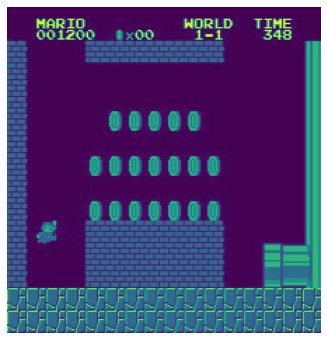

In [ ]:
import cv2 
import matplotlib.pyplot as plt

def imshow(img, figsize=(6, 6)):
    fig, ax = plt.subplots(1, 1, figsize=(figsize))
    ax.axis('off')
    ax.imshow(img)
    
img = cv2.imread('/content/game.png')
#Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img_gray)


In [ ]:
img_gray.shape

(233, 224)

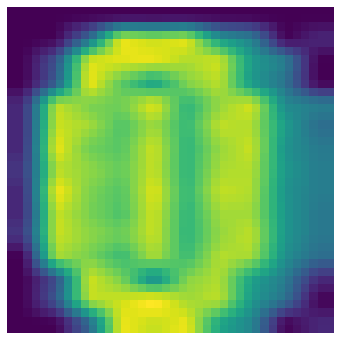

In [ ]:
template = cv2.imread('/content/coin.png',0)
# resized = cv2.resize(template,(40,40))
w, h = template.shape[::-1]

imshow(template)


In [ ]:
template.shape

(15, 10)

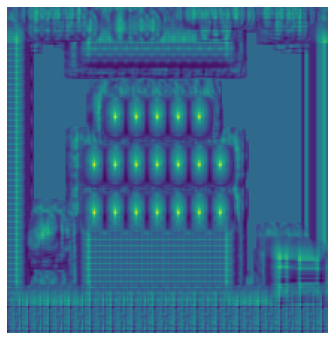

In [ ]:
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
imshow(res)


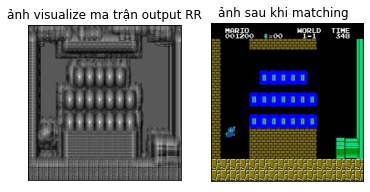

In [ ]:
w, h = template.shape[1], template.shape[0]
THRESHOLD = 0.6
loc = np.where(res >= THRESHOLD)

#Draw boudning box
for y, x in zip(loc[0], loc[1]):
    cv2.rectangle(img, (x, y), (x + w, y + h),  (0,0,255), 2)

plt.imshow(img)
plt.title('ảnh ban đầu '), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('ảnh visualize ma trận output RR'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('ảnh sau khi matching  '), plt.xticks([]), plt.yticks([])
plt.show()


# Template Matching một đối tượng 

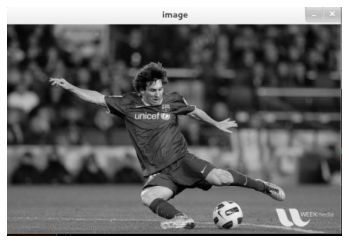

In [ ]:
import cv2 
import matplotlib.pyplot as plt

def imshow(img, figsize=(6, 6)):
    fig, ax = plt.subplots(1, 1, figsize=(figsize))
    ax.axis('off')
    ax.imshow(img)
    
img = cv2.imread('/content/opencv_screenshot.jpg')
#Convert to grayscale
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
imshow(img)


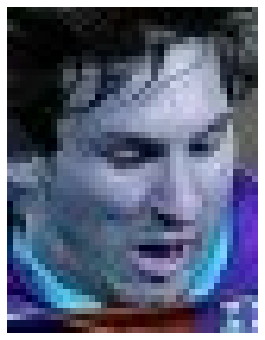

In [ ]:
template = cv2.imread('/content/messi_face.jpg')
imshow(template)


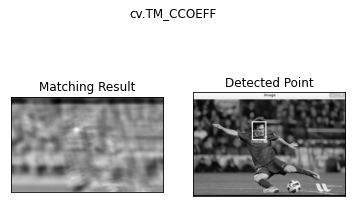

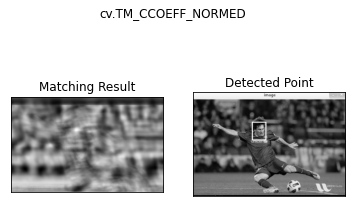

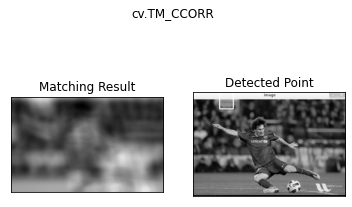

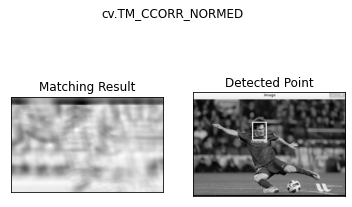

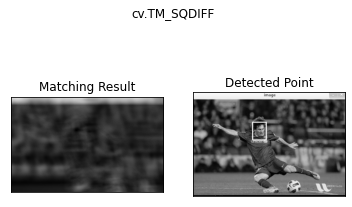

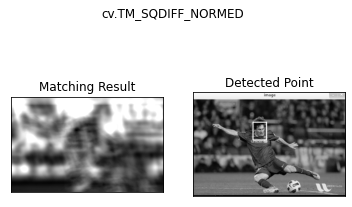

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/opencv_screenshot.jpg',0)
img2 = img.copy()
template = cv.imread('/content/messi_face.jpg',0)
w, h = template.shape[::-1]
# lấy tất cả các method trong matchTemplate
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    # lấy method ra 
    method = eval(meth)
    # áp đụng  template Matching
    res = cv.matchTemplate(img,template,method)
    # tìm min và max trong 1 array 
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    #  TM_SQDIFF or TM_SQDIFF_NORMED, thì lấy  minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    # Lý do 
    #After the function finishes the comparison, the best matches can be found as global minimums (when TM_SQDIFF was used) or maximums (when TM_CCORR or TM_CCOEFF was used) using the minMaxLoc function. 
    #In case of a color image, template summation in the numerator and each sum in the denominator is done over all of the channels and separate mean values are used for each channel. 
    #That is, the function can take a color template and a color image. The result will still be a single-channel image, which is easier to analyze.
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

# Reference
https://viblo.asia/p/object-detection-don-gian-su-dung-template-matching-va-opencv-gAm5yr7AKdb


https://www.geeksforgeeks.org/template-matching-using-opencv-in-python/